In [5]:
#pip install gymnasium[box2d]

In [3]:
import gymnasium as gym
"""
env = gym.make('LunarLander-v2')

# Ahora puedes interactuar con el entorno
obs = env.reset()
for _ in range(1000):
    env.render()
    action = env.action_space.sample() # Elegir una acción al azar
    obs, reward, done, info = env.step(action)
    if done:
        obs = env.reset()
env.close()
"""

"\nenv = gym.make('LunarLander-v2')\n\n# Ahora puedes interactuar con el entorno\nobs = env.reset()\nfor _ in range(1000):\n    env.render()\n    action = env.action_space.sample() # Elegir una acción al azar\n    obs, reward, done, info = env.step(action)\n    if done:\n        obs = env.reset()\nenv.close()\n"

In [1]:
import gymnasium as gym
env = gym.make ("LunarLander-v2", continuous = False )



In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from collections import deque

In [3]:
"""class PolicyNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = F.softmax(self.fc3(x), dim=-1)
        return x"""

'class PolicyNetwork(nn.Module):\n    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):\n        super(PolicyNetwork, self).__init__()\n        self.fc1 = nn.Linear(input_size, hidden_size1)\n        self.fc2 = nn.Linear(hidden_size1, hidden_size2)\n        self.fc3 = nn.Linear(hidden_size2, output_size)\n\n    def forward(self, x):\n        x = F.tanh(self.fc1(x))\n        x = F.tanh(self.fc2(x))\n        x = F.softmax(self.fc3(x), dim=-1)\n        return x'

In [4]:
"""class PolicyNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return F.softmax(self.fc3(x), dim=-1)"""





In [5]:
"""def train(num_episodes=500):
    # Hiperparámetros
    learning_rate = 0.005
    gamma = 0.99

    # Inicialización del entorno y la red
    env = gym.make("LunarLander-v2")
    state, _ = env.reset()  # Extraer solo el array de NumPy
    policy_net = PolicyNetwork(state.shape[0], 16, 32, env.action_space.n)
    optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)

    episode_rewards = []
    losses = []

    # Bucle de entrenamiento
    for episode in range(num_episodes):
        state, _ = env.reset()  # Extraer solo el array de NumPy
        #print("reset hecho")
        rewards = []
        log_probs = []
        done = False
        #print("variables inicializadas")
        while not done:
            #print("entrada en bucle")
            state_tensor = torch.from_numpy(state).float().unsqueeze(0)
            #print("state_tensor creado")
            probs = policy_net(state_tensor)
            #print("probs hechas con policy network")
            action = torch.multinomial(probs, 1).item()
            #print("action seleccionada")
            next_state = env.step(action)  # Manejar la respuesta completa
            #print("next state hecho")

            rewards.append(next_state[1])
            #print("se añade reward a la lista")
            log_prob = torch.log(probs.squeeze(0)[action])
            #print("log prob hecho")
            log_probs.append(log_prob)
            #print("log prob añadido a la lista")

            state = next_state[0]
            #print("actualización del state")

            done = next_state[2]

        # Calcular retorno con descuento
        R = 0
        returns = []
        for r in rewards[::-1]:
            R = r + gamma * R
            returns.insert(0, R)
        returns = torch.tensor(returns)
        returns = (returns - returns.mean()) / (returns.std() + 1e-5) # Normalizar
        #print("calculo return")
        episode_total_reward = sum(rewards)
        episode_rewards.append(episode_total_reward)
        
        # Actualizar la política
        policy_loss = []
        for log_prob, R in zip(log_probs, returns):
            policy_loss.append(-log_prob * R)
        optimizer.zero_grad()
        policy_loss = torch.cat([loss.unsqueeze(0) for loss in policy_loss]).sum()
        #policy_loss = torch.cat(policy_loss).sum()
        losses.append(policy_loss.item())
        policy_loss.backward()
        optimizer.step()
        #print("actualizacion de la politica")

    # Guardar el modelo
    torch.save(policy_net.state_dict(), 'lunar_lander_policy.pth')
    env.close()
    #print("guardar el modelo y cerrar entorno")

    # Graficar recompensas y pérdidas
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.title('Recompensas por Episodio')
    plt.xlabel('Episodio')
    plt.ylabel('Recompensa Total')
    plt.subplot(1, 2, 2)
    plt.plot(losses)
    plt.title('Pérdida de la Política por Episodio')
    plt.xlabel('Episodio')
    plt.ylabel('Pérdida')
    plt.tight_layout()
    plt.show()
    #print("plotear los graficos")"""

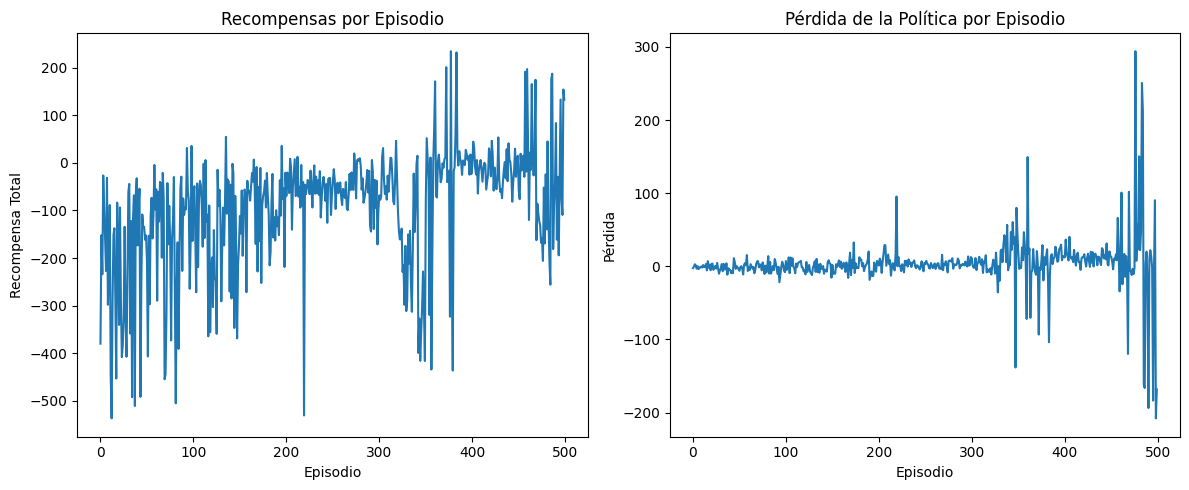

In [6]:
#train()


In [7]:
"""env = gym.make("LunarLander-v2")
state = env.reset()

print("Tipo de 'state' después de env.reset():", type(state))
print("Contenido de 'state' después de env.reset():", state)

action = env.action_space.sample()  # Tomar una acción aleatoria
next_state = env.step(action)

print("Tipo de 'next_state' después de env.step(action):", type(next_state))
print("Contenido de 'next_state' después de env.step(action):", next_state)
print(next_state[1])"""


Tipo de 'state' después de env.reset(): <class 'tuple'>
Contenido de 'state' después de env.reset(): (array([ 0.00689821,  1.418259  ,  0.6986969 ,  0.3261522 , -0.00798648,
       -0.15826517,  0.        ,  0.        ], dtype=float32), {})
Tipo de 'next_state' después de env.step(action): <class 'tuple'>
Contenido de 'next_state' después de env.step(action): (array([ 0.01372433,  1.4250116 ,  0.688685  ,  0.30006975, -0.01398962,
       -0.12007264,  0.        ,  0.        ], dtype=float32), 0.6749093240617594, False, False, {})
0.6749093240617594


In [ ]:
def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return F.softmax(self.fc3(x), dim=-1)

### OPTION 2

In [ ]:
class DQN(torch.nn.Module):
    
    def __init__(self, env, learning_rate=1e-3, device='cpu'):
        super(DQN, self).__init__()
        self.device = device
        self.n_inputs = env.observation_space.shape[0]
        self.n_outputs = env.action_space.n
        self.actions = np.arange(env.action_space.n)
        self.learning_rate = learning_rate
        
        ### Construction of the neural network
        self.model = torch.nn.Sequential(
            torch.nn.Linear(self.n_inputs, 16, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(16, self.n_outputs, bias=True))
        
        self.optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        
        ### Work with CUDA is allowed
        if self.device == 'cuda':
            self.model.cuda()
            
    
    ### e-greedy method
    def get_action(self, state, epsilon=0.05):
        if np.random.random() < epsilon:
            # random action
            action = np.random.choice(self.actions)  
        else:
            # Q-value based action
            qvals = self.get_qvals(state)  
            action= torch.max(qvals, dim=-1)[1].item()
        
        return action
    
    
    def get_qvals(self, state):
        if type(state) is tuple:
            state = np.array([np.ravel(s) for s in state])
        
        state_t = torch.FloatTensor(state).to(device=self.device)
        
        return self.model(state_t)

In [ ]:
from collections import namedtuple, deque

In [ ]:
class experienceReplayBuffer:

    def __init__(self, memory_size=50000, burn_in=10000):
        self.memory_size = memory_size
        self.burn_in = burn_in
        self.buffer = namedtuple('Buffer', field_names=['state', 'action', 'reward', 'done', 'next_state'])
        self.replay_memory = deque(maxlen=memory_size)

        
    ## We create a list of random indexes and package the experiences into Numpy arrays
    # (makes it easier to calculate the loss later)
    def sample_batch(self, batch_size=32):
        samples = np.random.choice(len(self.replay_memory), batch_size, replace=False)
        # Use asterisk operator to unpack deque 
        batch = zip(*[self.replay_memory[i] for i in samples])
        
        return batch

    
    ## New experiences are added 
    def append(self, state, action, reward, done, next_state):
        self.replay_memory.append(self.buffer(state, action, reward, done, next_state))

        
    ## The buffer is filled with random experiences at the beginning of training
    def burn_in_capacity(self):
        return len(self.replay_memory) / self.burn_in

### Agent

In [ ]:
from copy import deepcopy, copy

In [ ]:
class DQNAgent:
    
    def __init__(self, env, dnnetwork, buffer, epsilon=0.1, eps_decay=0.99, batch_size=32):
        self.env = env
        self.dnnetwork = dnnetwork
        self.target_network = deepcopy(dnnetwork) # red objetivo (copia de la principal)
        self.buffer = buffer
        self.epsilon = epsilon
        self.eps_decay = eps_decay
        self.batch_size = batch_size
        # block of the last X episodes to calculate the average reward 
        self.nblock = 100 
        # average reward used to determine if the agent has learned to play
        self.reward_threshold = self.env.spec.reward_threshold 
        
        self.initialize()
    
    
    def initialize(self):
        self.update_loss = []
        self.training_rewards = []
        self.mean_training_rewards = []
        self.sync_eps = []
        self.total_reward = 0
        self.step_count = 0
        self.state0 = self.env.reset()[0]
        
    
    ## Take new action
    def take_step(self, eps, mode='train'):
        if mode == 'explore': 
            # random action in burn-in and in the exploration phase (epsilon)
            action = self.env.action_space.sample() 
        else:
            # Action based on the Q-value (max Q-value)
            action = self.dnnetwork.get_action(self.state0, eps)
            self.step_count += 1
            
        # Execute action and get reward and new state
        new_state, reward, terminated, truncated, _ = self.env.step(action)
        done = terminated or truncated
        self.total_reward += reward
        # save experience in the buffer
        self.buffer.append(self.state0, action, reward, done, new_state) 
        self.state0 = new_state.copy()
        
        if done:
            self.state0 = self.env.reset()[0]
        
        return done

In [ ]:
## Training
def train(self, gamma=0.99, max_episodes=50000, 
            batch_size=32,
            dnn_update_frequency=4,
            dnn_sync_frequency=2000):
    
    self.gamma = gamma

    # Fill the buffer with N random experiences
    print("Filling replay buffer...")
    while self.buffer.burn_in_capacity() < 1:
        self.take_step(self.epsilon, mode='explore')

        
    episode = 0
    training = True
    print("Training...")
    while training:
        self.state0 = self.env.reset()[0]
        self.total_reward = 0
        gamedone = False
        while gamedone == False:
            # The agent takes an action
            gamedone = self.take_step(self.epsilon, mode='train')
            
            # Upgrade main network
            if self.step_count % dnn_update_frequency == 0:
                self.update()
            # Synchronize the main network and the target network
            if self.step_count % dnn_sync_frequency == 0:
                self.target_network.load_state_dict(
                    self.dnnetwork.state_dict())
                self.sync_eps.append(episode)
                
            if gamedone:                   
                episode += 1
                # Save the rewards
                self.training_rewards.append(self.total_reward) 
                self.update_loss = []
                # Calculate the average reward for the last X episodes
                mean_rewards = np.mean(self.training_rewards[-self.nblock:])
                self.mean_training_rewards.append(mean_rewards)

                print("\rEpisode {:d} Mean Rewards {:.2f} Epsilon {}\t\t".format(episode, mean_rewards, self.epsilon), end="")
                
                # Check if there are still episodes left
                if episode >= max_episodes:
                    training = False
                    print('\nEpisode limit reached.')
                    break
                
                # The game ends if the average reward has reached the threshold
                if mean_rewards >= self.reward_threshold:
                    training = False
                    print('\nEnvironment solved in {} episodes!'.format(episode))
                    break
                
                # Update epsilon according to the fixed decay rate
                self.epsilon = max(self.epsilon * self.eps_decay, 0.01)
                    

In [ ]:
## Loss calculation           
def calculate_loss(self, batch):
    # Separate the variables of the experience and convert them to tensors
    states, actions, rewards, dones, next_states = [i for i in batch] 
    rewards_vals = torch.FloatTensor(rewards).to(device=self.dnnetwork.device) 
    actions_vals = torch.LongTensor(np.array(actions)).reshape(-1,1).to(device=self.dnnetwork.device)
    dones_t = torch.BoolTensor(dones).to(device=self.dnnetwork.device)
    
    # Obtain the Q values of the main network
    qvals = torch.gather(self.dnnetwork.get_qvals(states), 1, actions_vals)
    
    # Obtain the target Q values.
    # The detach() parameter prevents these values from updating the target network
    qvals_next = torch.max(self.target_network.get_qvals(next_states), dim=-1)[0].detach()
    # 0 in terminal states
    qvals_next[dones_t] = 0 
    
    # Calculate the Bellman equation
    expected_qvals = self.gamma * qvals_next + rewards_vals
    
    # Calculate the loss
    loss = torch.nn.MSELoss()(qvals, expected_qvals.reshape(-1,1))
    return loss

In [ ]:
def update(self):
    # Remove any gradient
    self.dnnetwork.optimizer.zero_grad()  
    # Select a subset from the buffer
    batch = self.buffer.sample_batch(batch_size=self.batch_size) 
    # Calculate the loss
    loss = self.calculate_loss(batch) 
    # Difference to get the gradients
    loss.backward() 
    # Apply the gradients to the neural network
    self.dnnetwork.optimizer.step() 
    # Save loss values
    if self.dnnetwork.device == 'cuda':
        self.update_loss.append(loss.detach().cpu().numpy())
    else:
        self.update_loss.append(loss.detach().numpy())

### Hyperparameters

lr = 0.005            # Learning rate
MEMORY_SIZE = 100000  # Maximum buffer capacity
MAX_EPISODES = 5000   # Maximum number of episodes (the agent must learn before reaching this value)
EPSILON = 1           # Initial value of epsilon
EPSILON_DECAY = .99   # epsilon decay
GAMMA = 0.99          # Gamma value of the Bellman equation
BATCH_SIZE = 8       # Number of elements to extract from the buffer
BURN_IN = 1000        # Number of initial episodes used to fill the buffer before training
DNN_UPD = 1           # Neural network update rate
DNN_SYNC = 2500       # Frequency of synchronization between the neural network and the target network